In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
for i in df.columns:
  print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [8]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [10]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
# Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

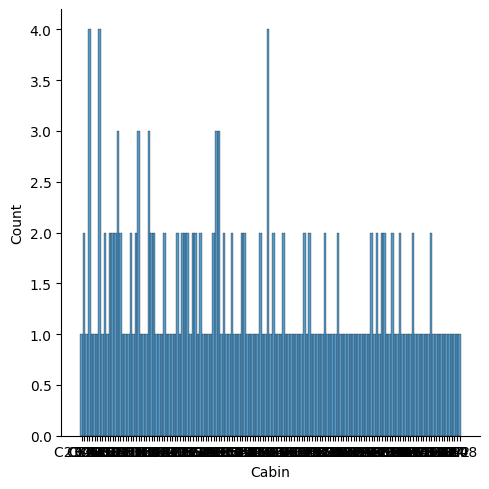

In [16]:
sns.displot(x='Cabin',data=df)

In [18]:
df['Age'].mean()

29.69911764705882

In [20]:
df['Age'].median()

28.0

In [21]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [22]:
df.isnull().sum().sort_values(ascending=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Cabin          687
dtype: int64

In [23]:
for i in df.columns:
  print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [27]:
df.drop(columns=['Cabin'],axis=1,inplace=True)

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum().sort_values(ascending=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
df.shape

(889, 11)

In [31]:
df.duplicated().sum()

0

In [33]:
# Unq features in each class
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [34]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [35]:
numcols=df.select_dtypes(include=np.number).columns
for col in numcols:
  print(df[col].value_counts())

1      1
599    1
588    1
589    1
590    1
      ..
302    1
303    1
304    1
305    1
891    1
Name: PassengerId, Length: 889, dtype: int64
0    549
1    340
Name: Survived, dtype: int64
3    491
1    214
2    184
Name: Pclass, dtype: int64
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64


In [36]:
catcols = df.select_dtypes(include='object').columns
for col in catcols:
  print(df[col].value_counts())

Braund, Mr. Owen Harris              1
Boulos, Mr. Hanna                    1
Frolicher-Stehli, Mr. Maxmillian     1
Gilinski, Mr. Eliezer                1
Murdlin, Mr. Joseph                  1
                                    ..
McCoy, Mr. Bernard                   1
Johnson, Mr. William Cahoone Jr      1
Keane, Miss. Nora A                  1
Williams, Mr. Howard Hugh "Harry"    1
Dooley, Mr. Patrick                  1
Name: Name, Length: 889, dtype: int64
male      577
female    312
Name: Sex, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [37]:
def attribute_info(df_feature):

 print('Descrition of attributes: ', '\n')
 print(df_feature.describe(), '\n')

 print('Value Counts of attributes: ', '\n')
 print(df_feature.value_counts(), '\n')

 print('Unique values of attributes: ', '\n')
 print(df_feature.unique(), '\n')

 print('Missing values of attributes: ', '\n')
 print(df_feature.isnull().sum(), '\n')
 print('% missing values of attributes: ', '\n')
 print(df_feature.isnull().sum()/len(df_feature), '\n')

In [39]:
for col in df:
 print('\033[1m'+'attribute_name :', col+'\033[0m', '\n')
 attribute_info(df[col])
 print('------------------------------------------------------------')


attribute_name : PassengerId 

Descrition of attributes:  

count    889.000000
mean     446.000000
std      256.998173
min        1.000000
25%      224.000000
50%      446.000000
75%      668.000000
max      891.000000
Name: PassengerId, dtype: float64 

Value Counts of attributes:  

1      1
599    1
588    1
589    1
590    1
      ..
302    1
303    1
304    1
305    1
891    1
Name: PassengerId, Length: 889, dtype: int64 

Unique values of attributes:  

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133

<Axes: >

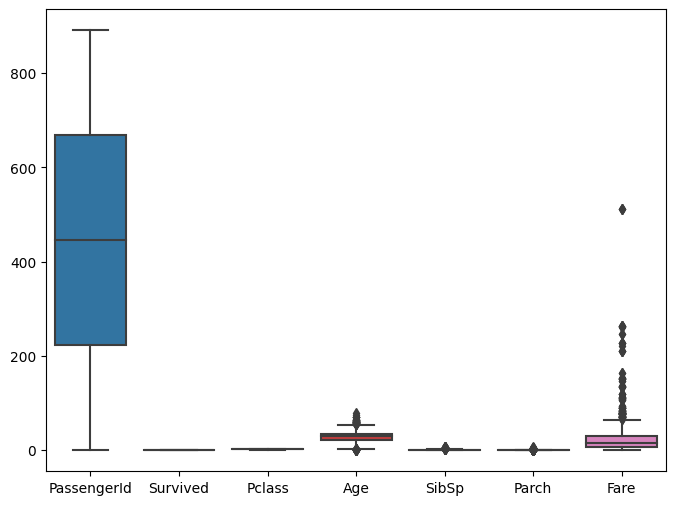

In [40]:
sns.boxplot(df)

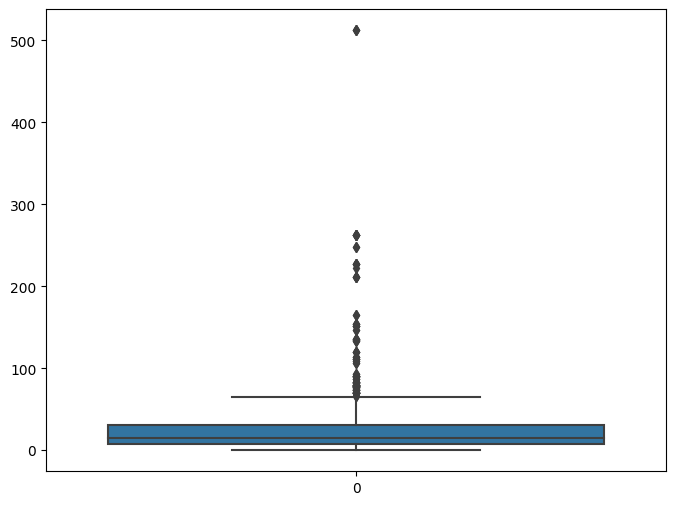

In [42]:
sns.boxplot(df['Fare'])
plt.show()

In [43]:
df[df['Age']>55]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,C


In [45]:
df[df['Age']>55].index

Int64Index([ 11,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252, 268,
            275, 280, 326, 366, 438, 456, 467, 483, 487, 493, 545, 555, 570,
            587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772, 851, 879],
           dtype='int64')

In [46]:
df = df.drop(index=[11,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252, 268,
            275, 280, 326, 366, 438, 456, 467, 483, 487, 493, 545, 555, 570,
            587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772, 851, 879],axis=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


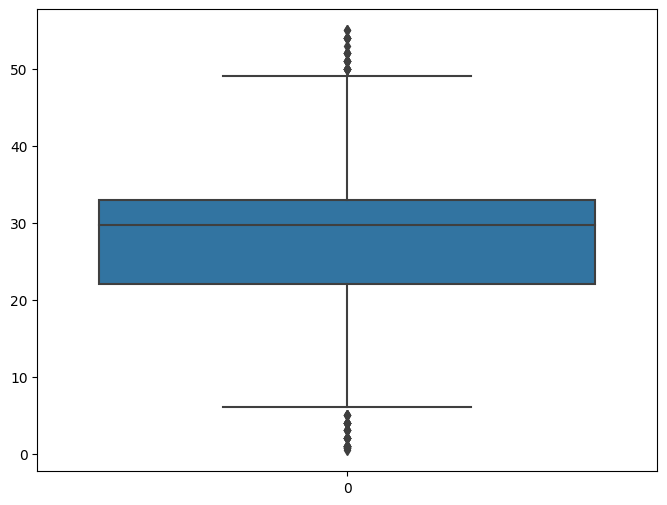

In [47]:
sns.boxplot(df['Age'])
rcParams['figure.figsize']=6,4

<Axes: xlabel='Survived', ylabel='count'>

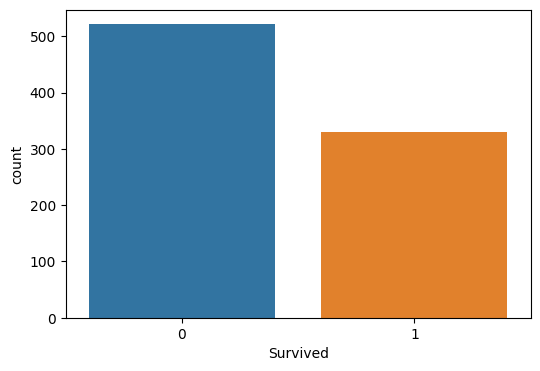

In [48]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Age', ylabel='count'>

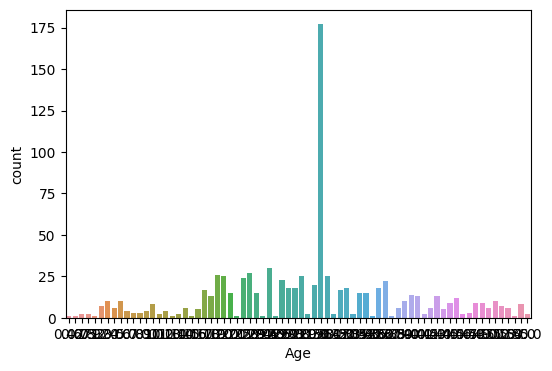

In [50]:
sns.countplot(x='Age',data=df)

In [51]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.007913,-0.036343,0.045048,-0.062420,-0.008597,0.013273
Survived,-0.007913,1.000000,-0.357239,-0.059314,-0.040984,0.086785,0.258152
Pclass,-0.036343,-0.357239,1.000000,-0.276959,0.073363,0.023384,-0.552587
Age,0.045048,-0.059314,-0.276959,1.000000,-0.232166,-0.203317,0.074870
SibSp,-0.062420,-0.040984,0.073363,-0.232166,1.000000,0.416823,0.162703
Parch,-0.008597,0.086785,0.023384,-0.203317,0.416823,1.000000,0.192542
Fare,0.013273,0.258152,-0.552587,0.074870,0.162703,0.192542,1.000000


<Axes: >

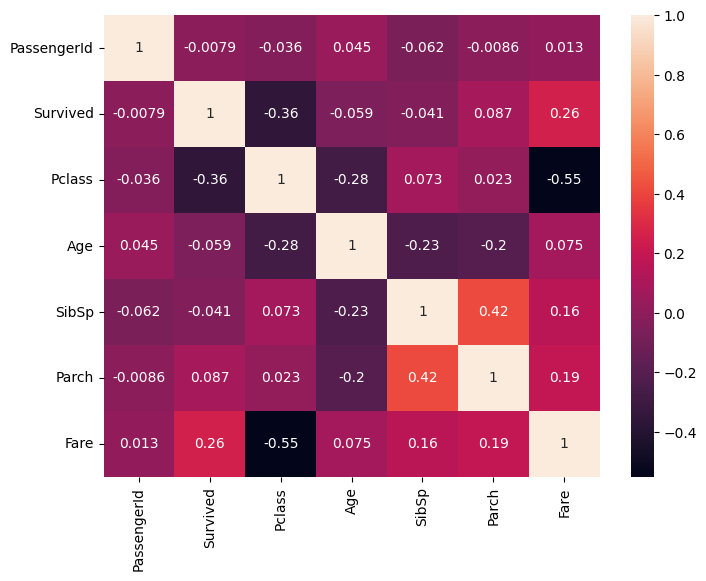

In [52]:
corr = df.corr()
plt.figure(figsize=[8,6])
sns.heatmap(corr,annot=True)


In [54]:
def correlation(df, threshold):

 cor_cor = set()
 cor_matrix = df.corr()

 for i in range(len(cor_matrix)):
  for j in range(i):
    if abs(cor_matrix.iloc[i, j]) > threshold:
      colname = cor_matrix.columns[i]
      cor_cor.add(colname)

 return cor_cor

In [55]:
cor_feature = correlation(df, 0.3)
print(len(set(cor_feature)))
cor_feature


3


{'Fare', 'Parch', 'Pclass'}

In [56]:
# Categorical to numeric
df['Gender'] = df['Sex'].map({'male':0,'female':1})


In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [58]:
df.drop(columns=['Name', 'Sex', 'Ticket', 'Embarked'],axis=1 ,inplace=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,0
1,2,1,1,38.000000,1,0,71.2833,1
2,3,1,3,26.000000,0,0,7.9250,1
3,4,1,1,35.000000,1,0,53.1000,1
4,5,0,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0
887,888,1,1,19.000000,0,0,30.0000,1
888,889,0,3,29.699118,1,2,23.4500,1
889,890,1,1,26.000000,0,0,30.0000,0


In [59]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,1.000000,-0.007913,-0.036343,0.045048,-0.062420,-0.008597,0.013273,-0.044232
Survived,-0.007913,1.000000,-0.357239,-0.059314,-0.040984,0.086785,0.258152,0.535848
Pclass,-0.036343,-0.357239,1.000000,-0.276959,0.073363,0.023384,-0.552587,-0.145311
Age,0.045048,-0.059314,-0.276959,1.000000,-0.232166,-0.203317,0.074870,-0.060088
SibSp,-0.062420,-0.040984,0.073363,-0.232166,1.000000,0.416823,0.162703,0.112571
Parch,-0.008597,0.086785,0.023384,-0.203317,0.416823,1.000000,0.192542,0.257160
Fare,0.013273,0.258152,-0.552587,0.074870,0.162703,0.192542,1.000000,0.180496
Gender,-0.044232,0.535848,-0.145311,-0.060088,0.112571,0.257160,0.180496,1.000000


<Axes: >

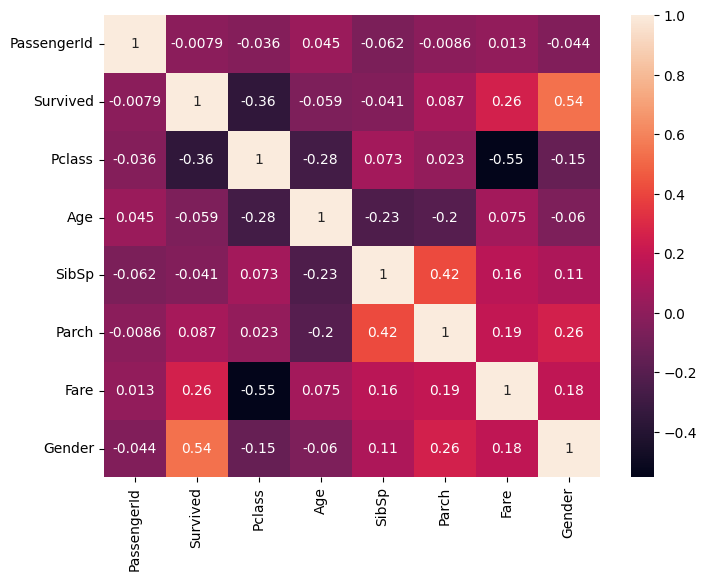

In [60]:
corr = df.corr()
plt.figure(figsize=[8,6])
sns.heatmap(corr,annot=True)


In [62]:
def correlation(df, threshold):

 cor_cor = set()
 cor_matrix = df.corr()

 for i in range(len(cor_matrix)):
  for j in range(i):
    if abs(cor_matrix.iloc[i, j]) > threshold:
      colname = cor_matrix.columns[i]
      cor_cor.add(colname)

 return cor_cor


In [64]:
cor_feature = correlation(df, 0.3)
print(len(set(cor_feature)))
cor_feature


4


{'Fare', 'Gender', 'Parch', 'Pclass'}

In [65]:
df.corr()['Survived']

PassengerId   -0.007913
Survived       1.000000
Pclass        -0.357239
Age           -0.059314
SibSp         -0.040984
Parch          0.086785
Fare           0.258152
Gender         0.535848
Name: Survived, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
x  = df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y = df['Survived']


In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33,random_state = 45)
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
774,775,2,54.000000,1,3,23.0000,1
338,339,3,45.000000,0,0,8.0500,0
405,406,2,34.000000,1,0,21.0000,0
302,303,3,19.000000,0,0,0.0000,0
846,847,3,29.699118,8,2,69.5500,0
...,...,...,...,...,...,...,...
762,763,3,20.000000,0,0,7.2292,0
638,639,3,41.000000,0,5,39.6875,1
571,572,1,53.000000,2,0,51.4792,1
677,678,3,18.000000,0,0,9.8417,1


In [69]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [70]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [71]:
len(y_train_pred)

569

In [72]:
len(y_test_pred),y_test_pred

(281,
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1]))

In [74]:
confusion_matrix(Y_train,y_train_pred)

array([[281,  58],
       [ 66, 164]])

In [75]:
print(classification_report(Y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       339
           1       0.74      0.71      0.73       230

    accuracy                           0.78       569
   macro avg       0.77      0.77      0.77       569
weighted avg       0.78      0.78      0.78       569



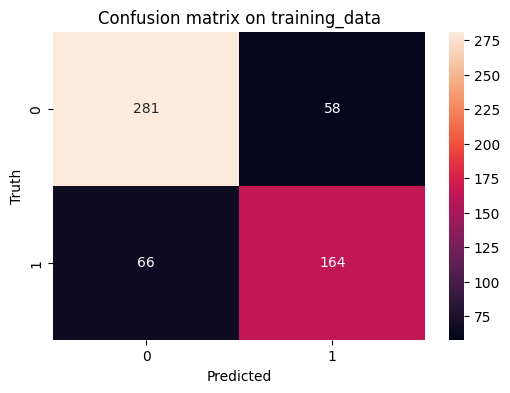

----------------------------
TP: 164
TN: 281
FP: 58
FN: 66


accuracy: 0.7820738137082601
F1-score: 0.7256637168141593
Precision: 0.7387387387387387
Recall: 0.7130434782608696


In [77]:
sns.heatmap(confusion_matrix(Y_train,y_train_pred), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")
tn, fp, fn, tp = confusion_matrix(Y_train,y_train_pred).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\n')
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('F1-score: {}'.format(f1_score(Y_train, y_train_pred)))
print('Precision: {}'.format(precision_score(Y_train,y_train_pred)))
print('Recall: {}'.format(recall_score(Y_train,y_train_pred)))


In [79]:
# improve model performance using Hyperparameter Tunings
X = df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((680, 7), (170, 7))

In [80]:
# Define the hyperparameters to tune
hyperparameters = {

 'penalty' : ['l1', 'l2', 'elasticnet'],
 'solver' : ['lbfgs', 'liblinear', 'newton-cg'],
 'C' : [1.0, 0.1, 0.01],
 'max_iter': [100, 200, 500, 1000]
}
hyperparameters

{'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['lbfgs', 'liblinear', 'newton-cg'],
 'C': [1.0, 0.1, 0.01],
 'max_iter': [100, 200, 500, 1000]}

In [81]:
from sklearn.model_selection import GridSearchCV#GridSearchCV => a technique for finding the optimal parameter values from a given set of parameters in a grid
classifier = LogisticRegression()
grid_search = GridSearchCV(classifier, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

In [83]:
  grid_search.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [84]:
grid_search.best_estimator_
# This attribute stores the model that was refit on the whole training data, and is the model that is used when calling predict and score

LogisticRegression(solver='liblinear')

In [85]:
grid_search.best_score_

0.7941176470588236

In [86]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)
print('\n')
# Evaluate the model with the best hyperparameters on the train set
best_classifier = grid_search.best_estimator_
y_train_pred = best_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy: ", accuracy)
# Evaluate the model with the best hyperparameters on the test set
best_classifier = grid_search.best_estimator_
y_test_pred = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: ", accuracy)

Best Hyperparameters:  {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score:  0.7941176470588236


Train Accuracy:  0.8
Test Accuracy:  0.7823529411764706


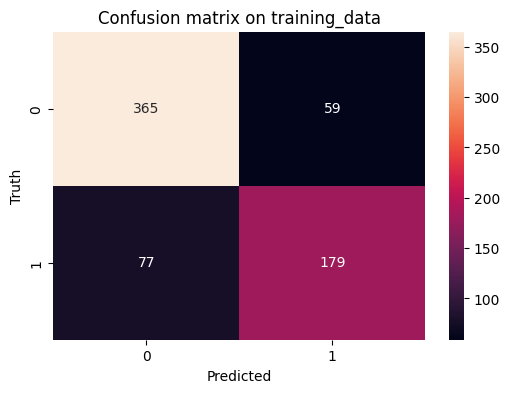

----------------------------
TP: 179
TN: 365
FP: 59
FN: 77


accuracy: 0.8
F1-score: 0.7246963562753037
Precision: 0.7521008403361344
Recall: 0.69921875


In [87]:
# on training data
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True, fmt='d')# fmt is used to select the datatype of the contents of the cells displayed.
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")
tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()#functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it).
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\n')
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('F1-score: {}'.format(f1_score(y_train, y_train_pred)))
print('Precision: {}'.format(precision_score(y_train,y_train_pred)))
print('Recall: {}'.format(recall_score(y_train,y_train_pred)))


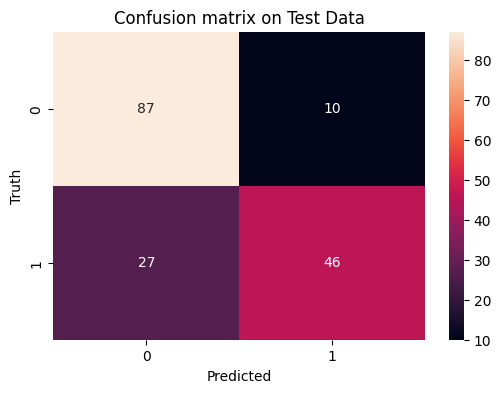

----------------------------
TP: 46
TN: 87
FP: 10
FN: 27


accuracy: 0.7823529411764706
F1-score: 0.7131782945736433
Precision: 0.8214285714285714
Recall: 0.6301369863013698


In [88]:
# On test data
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, fmt='d')
plt.title('Confusion matrix on Test Data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\n')
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('F1-score: {}'.format(f1_score(y_test,y_test_pred)))
print('Precision: {}'.format(precision_score(y_test,y_test_pred)))
print('Recall: {}'.format(recall_score(y_test,y_test_pred)))
